In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates, scatter_matrix
import numpy as np
import seaborn as sns
%matplotlib inline

dataset = pd.read_csv('adult.data', delimiter = ',', index_col = False, names = ["age", "workclass", "final_weight", "education", "education_num", "marital_status", "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss", "hours_per_week", "native_country", "class"])
dataset=dataset[dataset.workclass != ' ?']
dataset=dataset[dataset.occupation != ' ?']
dataset=dataset[dataset.native_country != ' ?']
data=pd.DataFrame(dataset)

data.head()
# dataset.head().transpose()

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   final_weight    30162 non-null  int64 
 3   education       30162 non-null  object
 4   education_num   30162 non-null  int64 
 5   marital_status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital_gain    30162 non-null  int64 
 11  capital_loss    30162 non-null  int64 
 12  hours_per_week  30162 non-null  int64 
 13  native_country  30162 non-null  object
 14  class           30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
#Get overall information of the dataset
dataset.shape

(30162, 15)

In [5]:
#Get more info about the dataset
dataset.describe()

,age,final_weight,education_num,capital_gain,capital_loss,hours_per_week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
#Check to see if there is any null values
dataset.isnull().values.any()

False

In [7]:
#checking for missing values
dataset.isnull().sum()

age               0
workclass         0
final_weight      0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
class             0
dtype: int64

In [8]:
dataset['class'].value_counts()

 <=50K    22654
 >50K      7508
Name: class, dtype: int64

In [9]:
dataset['sex'].value_counts()

 Male      20380
 Female     9782
Name: sex, dtype: int64

In [10]:
#Checking data type.Analyze object data and integer data respectively. 
dataset.dtypes

age                int64
workclass         object
final_weight       int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
class             object
dtype: object

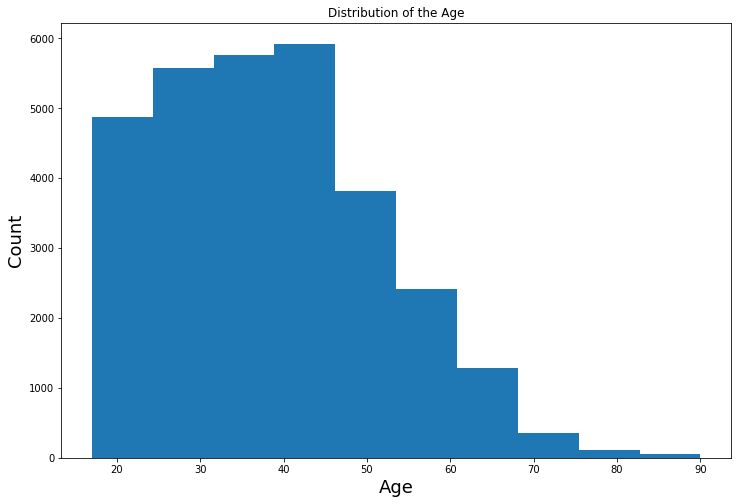

In [59]:
#Checking Age distribution
plt.figure(figsize=(12,8))
plt.hist(data['age'])
plt.title('Distribution of the Age')
plt.xlabel('Age', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.show()

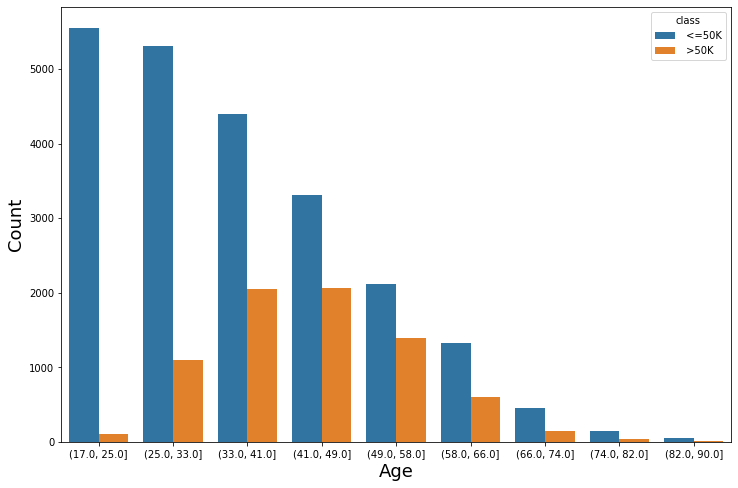

In [20]:
# Plotting count plot for age and income
data['Age'] = pd.cut(data['age'], 9, precision=0)
fig = plt.figure(figsize=(12,8))
sns.countplot(x="Age", hue="class", data=data)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.show()

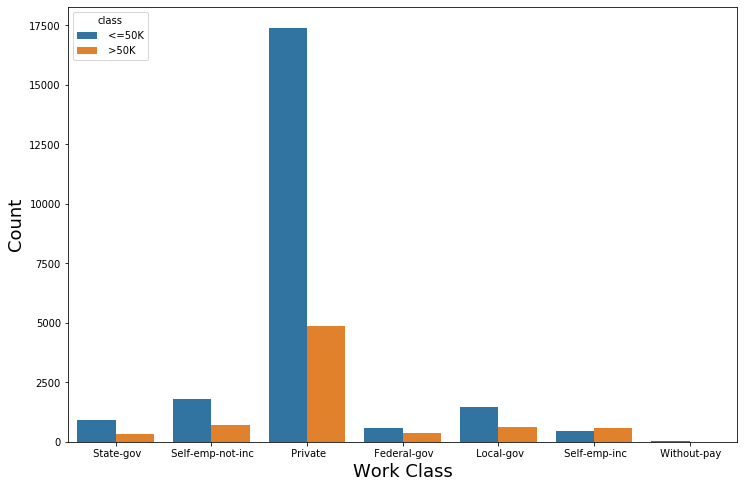

In [18]:
# Plotting count plot for workclass and income
plt.figure(figsize=(12,8))
sns.countplot(x='workclass', hue='class', data = data,orient='h')
plt.xlabel('Work Class', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xticks(rotation=0)
plt.show()

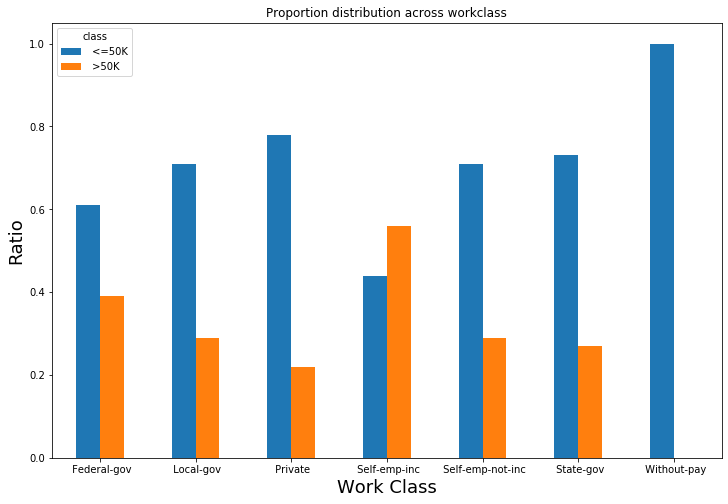

In [19]:
workclass = round(pd.crosstab(data['workclass'], data['class']).div(pd.crosstab(data['workclass'], data['class']).apply(sum,1),0),2)
# workclass.sort_values(by = '>50K', inplace = True)
workclass.plot(kind ='bar', title = 'Proportion distribution across workclass', figsize = (12,8), rot=30)
plt.xlabel('Work Class', fontsize=18)
plt.ylabel('Ratio', fontsize=18)
plt.xticks(rotation=0)
plt.show()

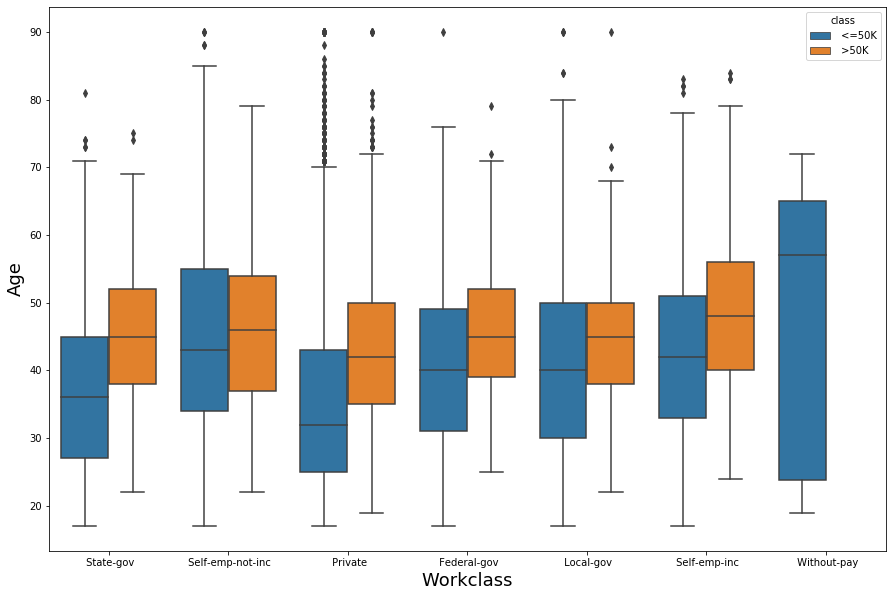

In [60]:
## Plotting boxplot for workclass, age and income
plt.figure(figsize=(15,10))
sns.boxplot(x="workclass",y="age", hue="class", data=data)
plt.xlabel('Workclass', fontsize=18)
plt.ylabel('Age', fontsize=18)
plt.show()